In [1]:
import os
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
'''
calculate mean and std of each cluster during the baseline period
calculate rolling mean firing rate
groupby cluster apply zscore 
'''

'\ncalculate mean and std of each cluster during the baseline period\ncalculate rolling mean firing rate\ngroupby cluster apply zscore \n'

In [3]:
path_to_data = r'C:\Users\Rory\raw_data\SERT_DREADD\spikes_df'
recordings_to_analyse = ['2018-04-18']
file = '\\'.join([path_to_data, recordings_to_analyse[0]]) + '.csv'
df = pd.read_csv(file, index_col=0)
df['spike'] = 1
df['time'] = pd.to_timedelta(df['time'], unit='s')

In [4]:
#calculate baseline
# compute mean in first period

baseline = df.loc[df['condition'] == 'Baseline']
base_ts = df.pivot_table(index='time', columns='spike_cluster', values='spike', aggfunc='count')
base_sec = base_ts.resample('s').count()
baseline_means = base_sec.transpose().mean(axis=1)
baseline_stds = base_sec.transpose().std(axis=1)

baseline_sorted = baseline_means.sort_values()
baseline_sorted.head()

spike_cluster
401    0.498016
215    0.556726
159    0.655809
219    0.761872
92     0.837964
dtype: float64

In [5]:
# rolling mean firing rate

df_ts = df.pivot_table(index='time', columns='spike_cluster', values='spike', aggfunc='count')
df_ts_sec = df_ts.resample('s').count()
fr_rolling = df_ts_sec.rolling(60*2).mean()
fr_rolling.transpose().head()

time,0 days 00:00:00.024200,0 days 00:00:01.024200,0 days 00:00:02.024200,0 days 00:00:03.024200,0 days 00:00:04.024200,0 days 00:00:05.024200,0 days 00:00:06.024200,0 days 00:00:07.024200,0 days 00:00:08.024200,0 days 00:00:09.024200,...,0 days 02:01:37.024200,0 days 02:01:38.024200,0 days 02:01:39.024200,0 days 02:01:40.024200,0 days 02:01:41.024200,0 days 02:01:42.024200,0 days 02:01:43.024200,0 days 02:01:44.024200,0 days 02:01:45.024200,0 days 02:01:46.024200
spike_cluster,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.508333,1.441667,1.383333,1.358333,1.358333,1.358333,1.358333,1.350000,1.333333,1.333333
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.050000,6.991667,6.908333,6.825000,6.733333,6.641667,6.558333,6.466667,6.383333,6.308333
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.808333,4.808333,4.783333,4.775000,4.766667,4.741667,4.700000,4.691667,4.675000,4.650000
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.833333,18.891667,18.891667,18.958333,19.025000,19.100000,19.033333,19.091667,19.150000,19.150000
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.750000,0.775000,0.766667,0.766667,0.758333,0.758333,0.758333,0.766667,0.775000,0.775000


In [8]:
# groupby spike_cluster

x = fr_rolling.transpose().apply(lambda col: (col.subtract(baseline_means)).divide(baseline_stds))

In [9]:
x = x.reindex(baseline_sorted.index)

In [37]:
recording_len= x.transpose().index.max().seconds

In [48]:
list(map(lambda num:str(round(recording_len/4/60 * num, -1)),
                               [1, 2, 3, 4]))

['30.0', '60.0', '90.0', '120.0']

In [27]:
'{1}'.format(1=str(recording_len/60/4)).split()

SyntaxError: keyword can't be an expression (<ipython-input-27-cc45ab7fc132>, line 1)

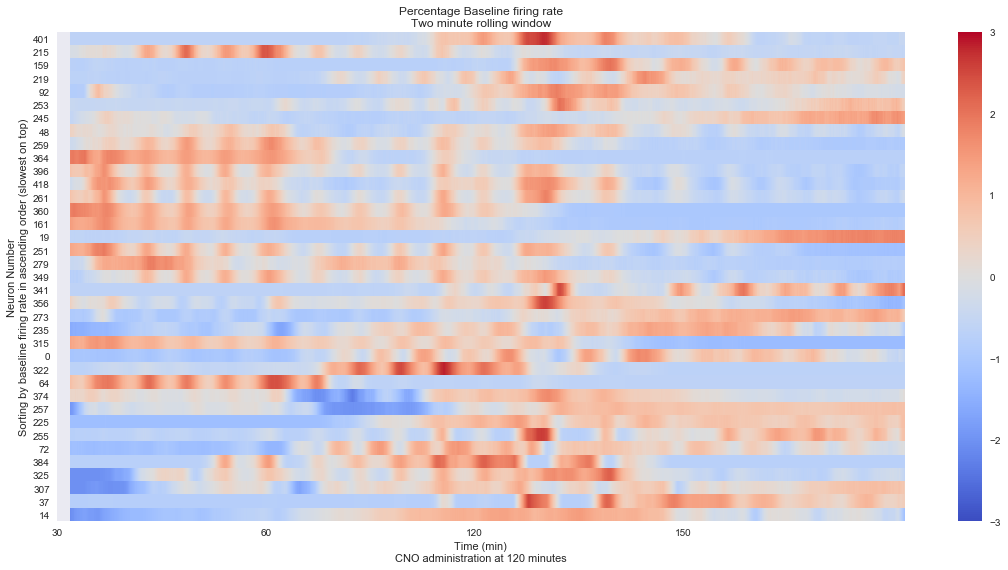

In [14]:
f, a = plt.subplots(figsize=(19, 9))
sns.heatmap(x, ax=a, cmap='coolwarm', vmin=-3, vmax=3, xticklabels=1800)
a.set_ylabel('Neuron Number\nSorting by baseline firing rate in ascending order (slowest on top)')
a.set_title('Percentage Baseline firing rate\nTwo minute rolling window')
a.set_xticklabels('30 60 120 150'.split())
a.set_xlabel('Time (min)\nCNO administration at 120 minutes')
plt.savefig(r'C:\Users\Rory\raw_data\SERT_DREADD\figures\{}.png'.format(recordings_to_analyse[0]), dpi=600)